In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import os 
from pathlib import Path
import shutil 
import pickle 

In [2]:
graphinfo = pickle.load(open("codegraphs/diversevul/diversevul_graph_info.pkl", "rb"))

In [3]:
logit_folders = [
    # 'runs/20240416-123420_9_FINAL_BareboneGCN_test/models/logits.pt',
    'runs/20240419-082022_9_FINAL_BareboneGIN_crossval_sl_ud_025/models/logits.pt',
    'runs/20240419-082233_9_FINAL_BareboneGIN_crossval_sl_ud_05/models/logits.pt',
    
    'runs/20240416-123910_9_FINAL_BareboneGIN_test/models/logits.pt',
    # 'runs/20240417-072542_9_2try_GIN_withnaivepredictor_linkpred_final/models/logits.pt',
    # 'runs/20240418-121306_9_FINAL_DRGCN_crossval_sl_dir_meanaggr_test/models/logits.pt',
    # 'runs/20240416-124942_9_FINAL_DRGCN_crossval_sl_dir_sumaggr_test/models/logits.pt',
    # 'runs/20240416-143913_9_FINAL_Reveal_crossval_ud_test/models/logits.pt',
    # 'runs/20240416-144108_9_finalHGPSL_crossval_sl_ud_test/models/logits.pt',
    # 'runs/20240418-080418_9_FINAL_GraphGLOW_GCN_crossval_sl_ud_test/models/logits.pt',
    
]
from tqdm.auto import tqdm

names = [ 'GIN-025', 'GIN-05', 'GIN',]
datadict = {}

len_= set()
for i, logit_folder in enumerate(logit_folders):
    logits = torch.load(logit_folder)
    templogits = {}
    for key in logits.keys():
        if key != 'filenames':
            templogits[key] = logits[key].cpu().numpy()
        else:
            templogits[key] = logits[key] 
    logits = templogits
    filenames = []
    for fil in logits['filenames']:
        filenames += fil 
        
    
            
        
    if len(len_) == 0:
        for name in filenames:
            len_.add(name)
            
    # get graph sizes 
    if not os.path.exists('codegraphs/diversevul/diversevul_graph_sizes.pt'):
        folder = 'v2_undirected_withdegreecount'
        sizes = {}
        for filename in tqdm(len_):
            sizes[filename] = torch.load(f'codegraphs/diversevul/{folder}/{filename}').x.shape[0] 
        
        torch.save(sizes, 'codegraphs/diversevul/diversevul_graph_sizes.pt')
    else:
        sizes = torch.load('codegraphs/diversevul/diversevul_graph_sizes.pt')
        
        # len_ = set(logits['filenames'])
                   
    datadict[names[i]] = {}
    # datadict[names[i]]['y'] = [] #logits['y']
    # datadict[names[i]]['y_hat'] = []#logits['y_hat']
    # datadict[names[i]]['filenames'] =[]# logits['filenames']
    # datadict[names[i]]['logits'] = []
    lastkey = None 
    for key in logits.keys():
        if key not in ['y', 'y_hat', 'filenames']:
            lastkey = key 
    
    for j in range(logits['y'].shape[0]):
        if filenames[j] in len_:
            datadict[names[i]][filenames[j]] = {}
            # datadict[names[i]]['y'].append(logits['y'][j])
            # datadict[names[i]]['y_hat'].append(logits['y_hat'][j])
            # datadict[names[i]]['filenames'].append(filenames[j])
            # datadict[names[i]]['logits'].append(logits[lastkey][j])
            datadict[names[i]][filenames[j]]['y'] = logits['y'][j]
            datadict[names[i]][filenames[j]]['y_hat'] = logits['y_hat'][j]
            datadict[names[i]][filenames[j]]['logits'] = logits[lastkey][j]
      
# add num_nodes which has as logits graph lengths and as y_hat graph length> 102
datadict['num_nodes'] = {}
for key in sizes.keys():
    datadict['num_nodes'][key] = {}
    
    if sizes[key] > 102:
        datadict['num_nodes'][key]['y_hat'] = 1
    else:
        datadict['num_nodes'][key]['y_hat'] = 0
        
    datadict['num_nodes'][key]['logits'] = sizes[key]
    datadict['num_nodes'][key]['y'] = datadict['GIN'][key]['y']
        
        
        
      

/opt/conda/envs/pyg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(array([9477., 7276., 5317., 3765., 2862., 2228., 1834., 1455., 1204.,
         887.,  848.,  721.,  599.,  505.,  444.,  363.,  345.,  323.,
         270.,  236.,  244.,  195.,  199.,  171.,  168.,  141.,  115.,
          88.,   89.,  104.,   82.,   65.,   89.,   65.,   71.,   70.,
          58.,   67.,   50.,   42.,   48.,   47.,   57.,   42.,   36.,
          36.,   36.,   35.,   29.,   22.]),
 array([  10. ,   29.8,   49.6,   69.4,   89.2,  109. ,  128.8,  148.6,
         168.4,  188.2,  208. ,  227.8,  247.6,  267.4,  287.2,  307. ,
         326.8,  346.6,  366.4,  386.2,  406. ,  425.8,  445.6,  465.4,
         485.2,  505. ,  524.8,  544.6,  564.4,  584.2,  604. ,  623.8,
         643.6,  663.4,  683.2,  703. ,  722.8,  742.6,  762.4,  782.2,
         802. ,  821.8,  841.6,  861.4,  881.2,  901. ,  920.8,  940.6,
         960.4,  980.2, 1000. ]),
 <BarContainer object of 50 artists>)

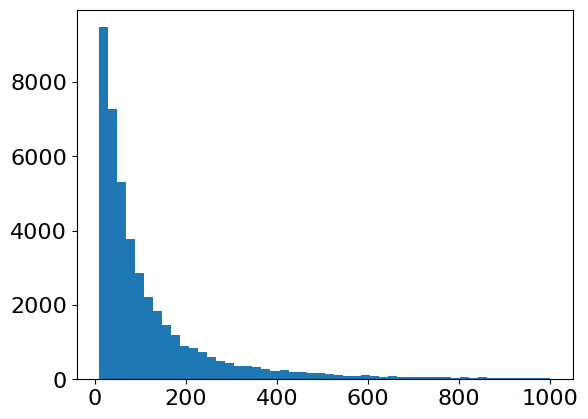

In [5]:
import matplotlib.pyplot as plt

# hist graph sizes, variable is size with values being graph sizes
plt.hist(list(sizes.values()), bins=50)

In [6]:
!pip install seaborn

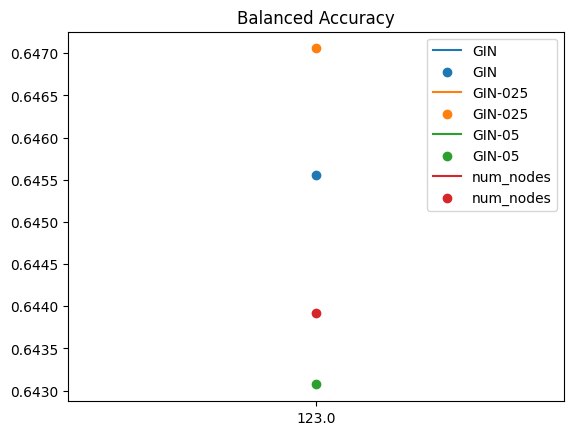

In [5]:
# divide files into 10 equal num bins based on graph size
num_bins = 1
bins = [[] for _ in range(num_bins)]
binsizes = [[] for _ in range(num_bins)]

sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])

len_files = len(sorted_sizes)
current_bin = 0
for file in sorted_sizes:
    # fill bins from the bottom
    bins[current_bin].append(file[0])
    binsizes[current_bin].append(file[1])
    if len(bins[current_bin]) >= len_files / num_bins:
        current_bin += 1
        
# plot performance of each model on each bin
bin_average_size = [np.mean(bin) for bin in binsizes]
# for model in datadict.keys():
#     model_performance = []
#     for bin in bins:
#         bin_performance = []
#         for file in bin:
#             bin_performance.append(datadict[model][file]['y'] == datadict[model][file]['y_hat'])
#         model_performance.append(sum(bin_performance) / len(bin_performance))
#     plt.plot(model_performance, label=model)
#     # x-axis is average size of bin
#     plt.xticks(range(10), [round(x,0) for x in bin_average_size])

# plot model balanced accuracy on each bin
from sklearn.metrics import balanced_accuracy_score
for model in datadict.keys():
    model_performance = []
    for bin in bins:
        y_true = []
        y_pred = []
        for file in bin:
            y_true.append(datadict[model][file]['y'])
            y_pred.append(datadict[model][file]['y_hat'])
        model_performance.append(balanced_accuracy_score(y_true, y_pred))
    
    plt.title('Balanced Accuracy')
    plt.plot(model_performance, label=model)
    plt.scatter(range(num_bins), model_performance, label=model)
    # x-axis is average size of bin
    plt.xticks(range(num_bins), [round(x,0) for x in bin_average_size])
    
    plt.legend()

Model: GIN-025, Num bins: 1, Mean balanced accuracy: 0.6470558928420826 [0.6470558928420826]
Model: GIN-025, Num bins: 2, Mean balanced accuracy: 0.5302646800036306 [0.5092823267388753, 0.5512470332683859]
Model: GIN-025, Num bins: 3, Mean balanced accuracy: 0.5155023844257918 [0.5046726353243381, 0.5347230491734379, 0.5071114687795992]
Model: GIN-025, Num bins: 4, Mean balanced accuracy: 0.5116324582667533 [0.49967123802367086, 0.5105503675903215, 0.5345312938534943, 0.5017769335995268]
Model: GIN-025, Num bins: 5, Mean balanced accuracy: 0.5124030841603086 [0.49994141769185707, 0.5026303204208513, 0.5373451288130705, 0.5215520898996266, 0.5005464639761369]
Model: GIN-025, Num bins: 6, Mean balanced accuracy: 0.5086601774372278 [0.5, 0.5058209347065431, 0.5107229391141541, 0.5233724948730198, 0.5119674280627753, 0.5000772678668747]
Model: GIN-025, Num bins: 7, Mean balanced accuracy: 0.5084054306825013 [0.5, 0.5003527356002474, 0.5100229807875984, 0.5198209146146466, 0.522467026846965

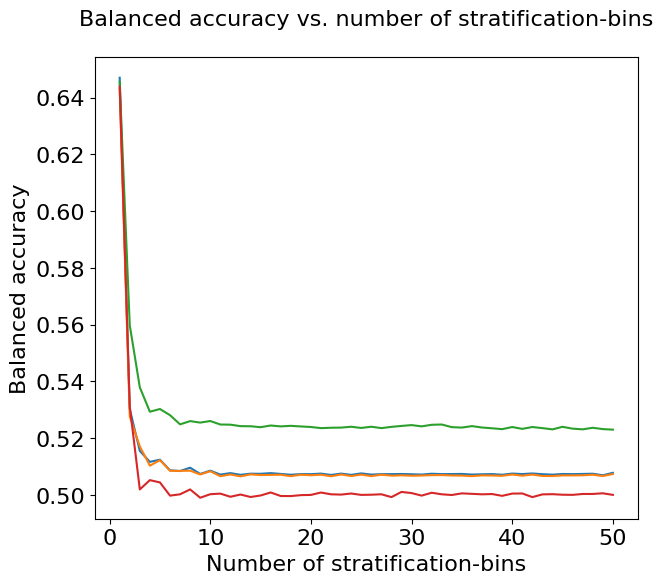

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

num_bins_range = range(1, 51)  # Adapt this range as per your needs
fig= plt.figure(figsize=(7, 6))

for model in datadict.keys():
    perf_vs_bins = []

    for num_bins in num_bins_range:
        # Divide files into num_bins based on graph size
        bins = [[] for _ in range(num_bins)]
        sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])
        len_files = len(sorted_sizes)

        current_bin = 0
        for file in sorted_sizes:
            # Fill bins from the bottom
            bins[current_bin].append(file[0])
            if len(bins[current_bin]) >= len_files / num_bins:
                current_bin += 1

        # Calculate model performance on each bin and average
        model_performance = []
        for bin in bins:
            y_true = []
            y_pred = []
            for file in bin:
                y_true.append(datadict[model][file]['y'])
                y_pred.append(datadict[model][file]['y_hat'])
            model_performance.append(balanced_accuracy_score(y_true, y_pred))
        
        print(f"Model: {model}, Num bins: {num_bins}, Mean balanced accuracy: {np.mean(model_performance)}",model_performance)
        mean_perf = np.mean(model_performance)
        perf_vs_bins.append(mean_perf)

    # Plot balanced accuracy as a function of num_bins
    plt.plot(num_bins_range, perf_vs_bins, label=model)

plt.title('Balanced accuracy vs. number of stratification-bins',y = 1.05)
plt.xlabel('Number of stratification-bins')
plt.ylabel('Balanced accuracy')
# leg = plt.legend(bbox_to_anchor=(1, 1.02), ncol=1)

# # leg = ax.legend(loc='lower right')
# leg.get_frame().set_edgecolor('black')
# # # background white of legend white
# leg.get_frame().set_facecolor('white')
# # # set backgrond non-transparent
# leg.get_frame().set_alpha(1)
# set edge color 
# leg.get_frame().set_linewidth(0.0)


plt.savefig(f"stratbins_gin_difftrainingingsize_balancedaccuracy.png", dpi=300, bbox_inches='tight')
plt.show()

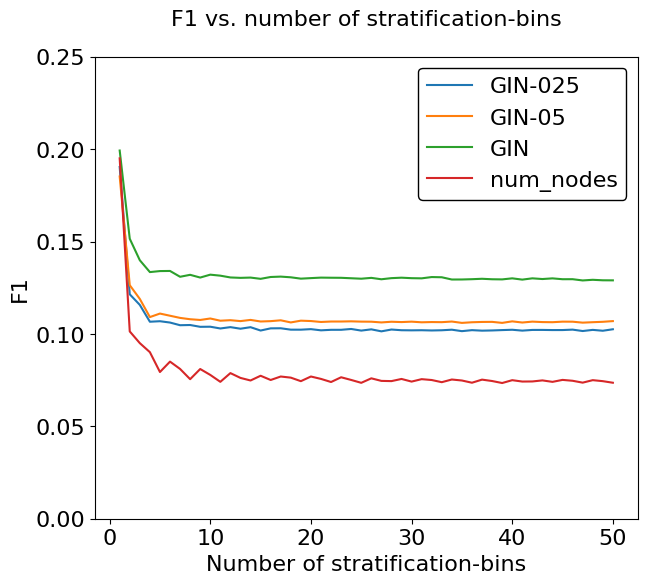

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

num_bins_range = range(1, 51)  # Adapt this range as per your needs

fig= plt.figure(figsize=(7, 6))
for model in datadict.keys():
    perf_vs_bins = []

    for num_bins in num_bins_range:
        # Divide files into num_bins based on graph size
        bins = [[] for _ in range(num_bins)]
        sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])
        len_files = len(sorted_sizes)

        current_bin = 0
        for file in sorted_sizes:
            # Fill bins from the bottom
            bins[current_bin].append(file[0])
            if len(bins[current_bin]) >= len_files / num_bins:
                current_bin += 1

        # Calculate model performance on each bin and average
        model_performance = []
        for bin in bins:
            y_true = []
            y_pred = []
            for file in bin:
                y_true.append(datadict[model][file]['y'])
                y_pred.append(datadict[model][file]['y_hat'])
            model_performance.append(f1_score(y_true, y_pred))
        
        mean_perf = np.mean(model_performance)
        perf_vs_bins.append(mean_perf)

    # Plot balanced accuracy as a function of num_bins
    plt.plot(num_bins_range, perf_vs_bins, label=model)



plt.title('F1 vs. number of stratification-bins',y = 1.05)
plt.xlabel('Number of stratification-bins')
plt.ylabel('F1')
leg = plt.legend()

# leg = ax.legend(loc='lower right')
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
# set edge color 
# leg.get_frame().set_linewidth(0.0)
# set x lim
plt.ylim(0, 0.25)

plt.savefig(f"stratbins_gin_difftrainingingsize_f1score.png", dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# model performance per cwe, cwe in 
# cwe_files = {}
cwe_files = {}
for d in graphinfo:
    if len(d['cwe']) > 0:
        cwe_files[str(d['commit_id'])+'_'+str(d['hash'])+'_'+str(d['target'])+'.cpg.pt'] = d['cwe']

set_Files = set(list(cwe_files.keys()))

model_performances = {}

for model in datadict.keys():
    model_performance = {}
    for file in datadict[model].keys():
        if file in set_Files:
            cwes = cwe_files[file]
            for cwe in cwes:
                if cwe not in model_performance:
                    model_performance[cwe] = {}
                    model_performance[cwe]['y'] = []
                    model_performance[cwe]['y_hat'] = []
                    model_performance[cwe]['logits'] = []
                
                model_performance[cwe]['y'].append(datadict[model][file]['y'])
                model_performance[cwe]['y_hat'].append(datadict[model][file]['y_hat'])
                model_performance[cwe]['logits'].append(datadict[model][file]['logits'])
    
    model_performances[model] = model_performance   

In [8]:
# cwe counts
cwe_counts = {}
for cwefile, cwe in cwe_files.items():
    for c in cwe:
        if c not in cwe_counts:
            cwe_counts[c] = 0
        cwe_counts[c] += 1

# sort cwes by count
sorted_cwes = sorted(cwe_counts.items(), key=lambda x: x[1], reverse=True)
sorted_cwe_indices = [x[0] for x in sorted_cwes]

In [ ]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(14, 6))
for model in model_performances.keys():
    cwe_perf = [-1 for _ in range(len(sorted_cwes))]
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        bacc = balanced_accuracy_score(y_true, y_pred)
        # cwe_perf.append(bacc)
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    # rather plot accumulated performance
    # plt.plot(range(len(cwe_perf)), np.cumsum(cwe_perf), label=model)
            
plt.title('Balanced Accuracy per CWE')
plt.ylabel('Balanced accuracy')
plt.xlabel('CWEs sorted by count (descending)')
plt.legend()
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.savefig(f"bacc_vs_cwe.png", dpi=300, bbox_inches='tight')
plt.ylim(0, 1)

# make xticks from 1 to 150 
plt.xticks(range(0, 151, 10))

/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not 

best bacc CWE-190 0.6264309644538728
best bacc CWE-863 0.6088435374149659
best bacc CWE-120 0.6567589265234345
best bacc CWE-189 0.6498068924539513
best bacc CWE-119 0.6523495084530814
best bacc CWE-787 0.6376716808371484
best bacc CWE-399 0.6486546369824163
best bacc CWE-22 0.6084736251402918
best bacc CWE-20 0.6324390747487395
best bacc CWE-287 0.654232424677188
best bacc CWE-284 0.6435837245696401
best bacc CWE-770 0.6572567783094099
best bacc CWE-254 0.6283783783783784
best bacc CWE-59 0.676607365792759
best bacc CWE-61 0.634869535750593
best bacc CWE-476 0.6143483709273183
best bacc CWE-703 0.5863521628381416
best bacc CWE-674 0.5666570549788543
best bacc CWE-362 0.678532460447354
best bacc CWE-617 0.5668348623853211
best bacc CWE-125 0.6572736330800847
best bacc CWE-369 0.6512819028878987
best bacc CWE-134 0.8571428571428572
best bacc CWE-200 0.6650241684014904
best bacc CWE-835 0.755718954248366
best bacc CWE-264 0.709935438730401
best bacc CWE-415 0.619869771112865
best bacc CW

/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matr

best bacc all models 0.6428574971808396


([<matplotlib.axis.XTick at 0x7ff2e613c2d0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50')])

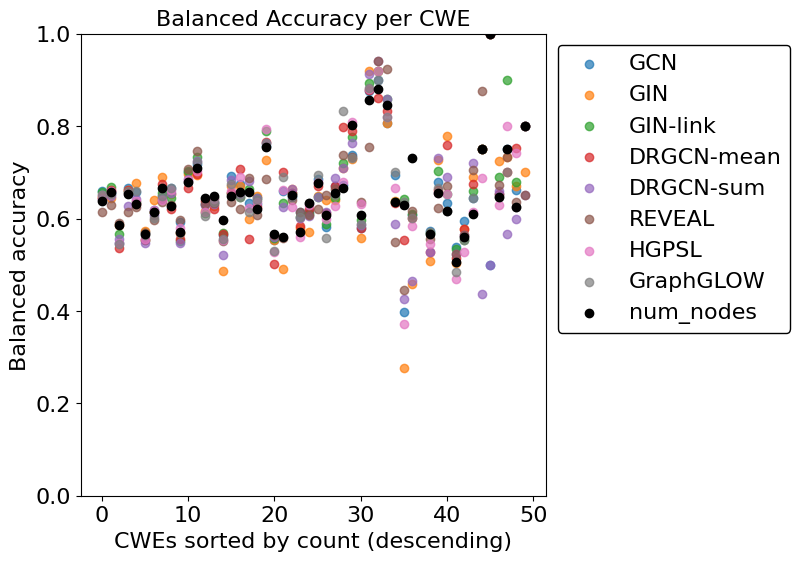

In [28]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(6, 6))
models_cwe_perf = {}
for model in model_performances.keys():
    cwe_perf = [-1 for _ in range(50)]
    cwe_y_y_hat = {}
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        bacc = balanced_accuracy_score(y_true, y_pred)
        # cwe_perf.append(bacc)
        if sorted_cwe_indices.index(cwe)>49:
            continue
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
        cwe_y_y_hat[cwe] = (y_true, y_pred)
        
        
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    models_cwe_perf[model] = cwe_perf

    # rather plot accumulated performance
    # plt.plot(range(len(cwe_perf)), np.cumsum(cwe_perf), label=model)

# max possible performance
max_bacc = 0 
bacc_num_nodes = 0
all_y, all_y_hat = [], []
for cwe in cwe_y_y_hat.keys():
    best_bacc = 0
    best_y, best_y_hat = [], []
    for model, cwe_perf in models_cwe_perf.items():
        if model == 'num_nodes':
            continue
        y, y_hat = cwe_y_y_hat[cwe]
        bacc = balanced_accuracy_score(y, y_hat)
        if bacc > best_bacc:
            best_bacc = bacc
            best_y = y
            best_y_hat = y_hat
            
    # print(f"best bacc {cwe}", best_bacc)  
    all_y += best_y
    all_y_hat += best_y_hat
    
print("best bacc all models", balanced_accuracy_score(all_y, all_y_hat))
            
plt.title('Balanced Accuracy per CWE')
plt.ylabel('Balanced accuracy')
plt.xlabel('CWEs sorted by count (descending)')
plt.legend()
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1), ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.savefig(f"bacc_vs_cwe.png", dpi=300, bbox_inches='tight')
plt.ylim(0, 1)

# make xticks from 1 to 150 
plt.xticks(range(0, 51, 10))

/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/pyg/lib/p

([<matplotlib.axis.XTick at 0x7fa0674c9010>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100'),
  Text(110, 0, '110'),
  Text(120, 0, '120'),
  Text(130, 0, '130'),
  Text(140, 0, '140'),
  Text(150, 0, '150')])

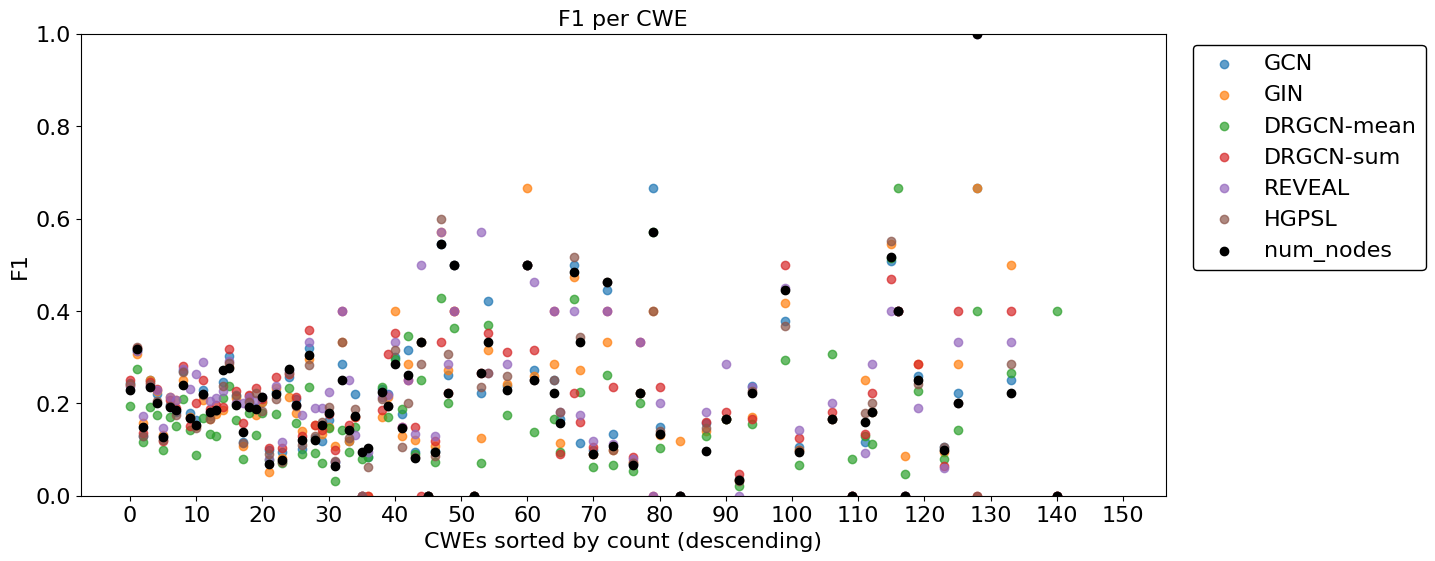

In [97]:
# plot model performances per cwe for all models as scatter plot in one plot
# balanced accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy


font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

fig= plt.figure(figsize=(14, 6))
for model in model_performances.keys():
    cwe_perf = [-1 for _ in range(len(sorted_cwes))]
    for cwe in model_performances[model].keys():
        y_true = model_performances[model][cwe]['y']
        y_pred = model_performances[model][cwe]['y_hat']
        bacc = f1_score(y_true, y_pred)
        # cwe_perf.append(bacc)
        cwe_perf[sorted_cwe_indices.index(cwe)] = bacc
    if model=='num_nodes':
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=1, c='black')
    else:
        plt.scatter(range(len(cwe_perf)), cwe_perf, label=model, alpha=0.7)
    
    # rather plot accumulated performance
    # plt.plot(range(len(cwe_perf)), np.cumsum(cwe_perf), label=model)
            
plt.title('F1 per CWE')
plt.ylabel('F1')
plt.xlabel('CWEs sorted by count (descending)')
plt.legend()
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
# plt.ylim(0, 1000)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
plt.savefig(f"f1_vs_cwe.png", dpi=300, bbox_inches='tight')
plt.ylim(0, 1)

# make xticks from 1 to 150 
plt.xticks(range(0, 151, 10))

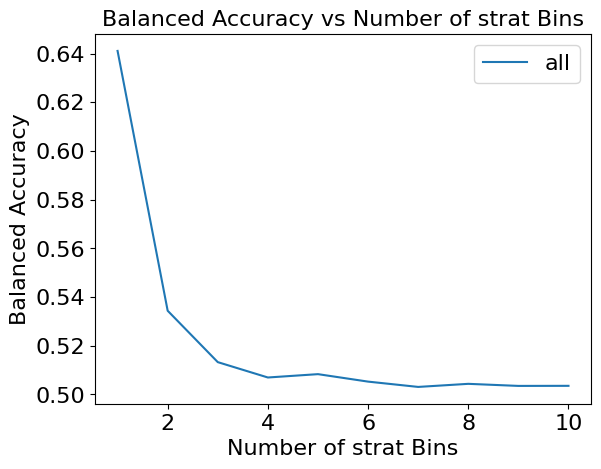

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

num_bins_range = range(1, 11)  # Adapt this range as per your needs

# for model in datadict.keys():
perf_vs_bins = []

for num_bins in num_bins_range:
    # Divide files into num_bins based on graph size
    bins = [[] for _ in range(num_bins)]
    sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])
    len_files = len(sorted_sizes)

    current_bin = 0
    for file in sorted_sizes:
        # Fill bins from the bottom
        bins[current_bin].append(file[0])
        if len(bins[current_bin]) >= len_files / num_bins:
            current_bin += 1

    # Calculate model performance on each bin and average
    model_performance = []
    for bin in bins:
        y_true = []
        y_pred = []
        for file in bin:
            yt = datadict[model][file]['y']
            ypred = []
            for model in datadict.keys():
                # yt = datadict[model][file]['y']
                ypred = datadict[model][file]['y_hat']
                
            y_true.append(yt)
            y_pred.append(np.median(ypred))
            # y_true.append(datadict[model][file]['y'])
            # y_pred.append(datadict[model][file]['y_hat'])
        model_performance.append(balanced_accuracy_score(y_true, y_pred))
    
    mean_perf = np.mean(model_performance)
    perf_vs_bins.append(mean_perf)

# Plot balanced accuracy as a function of num_bins
plt.plot(num_bins_range, perf_vs_bins, label='all')

plt.title('Balanced Accuracy vs Number of strat Bins')
plt.xlabel('Number of strat Bins')
plt.ylabel('Balanced Accuracy')
plt.legend()
plt.show()

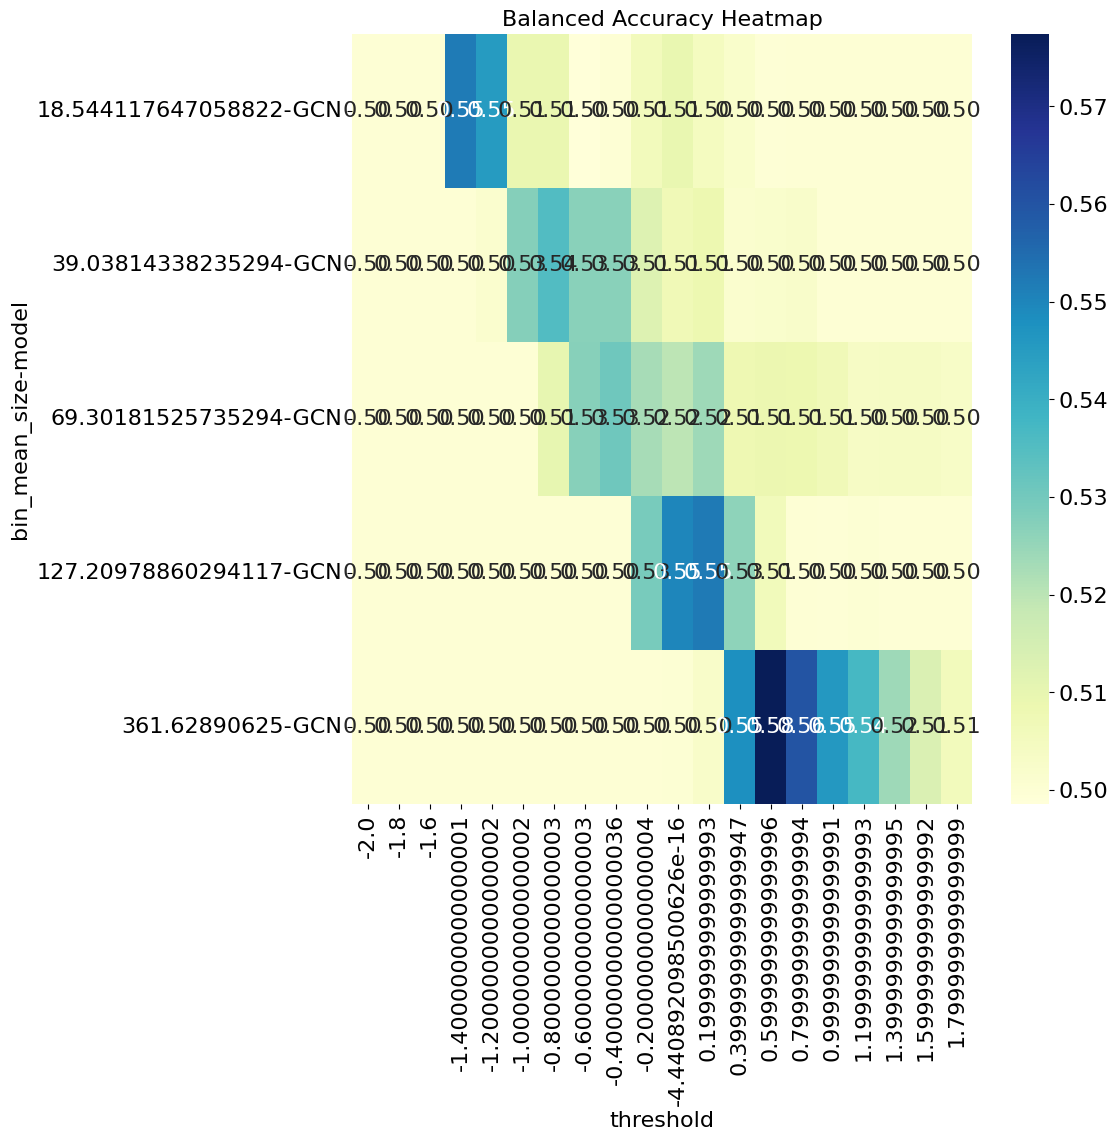

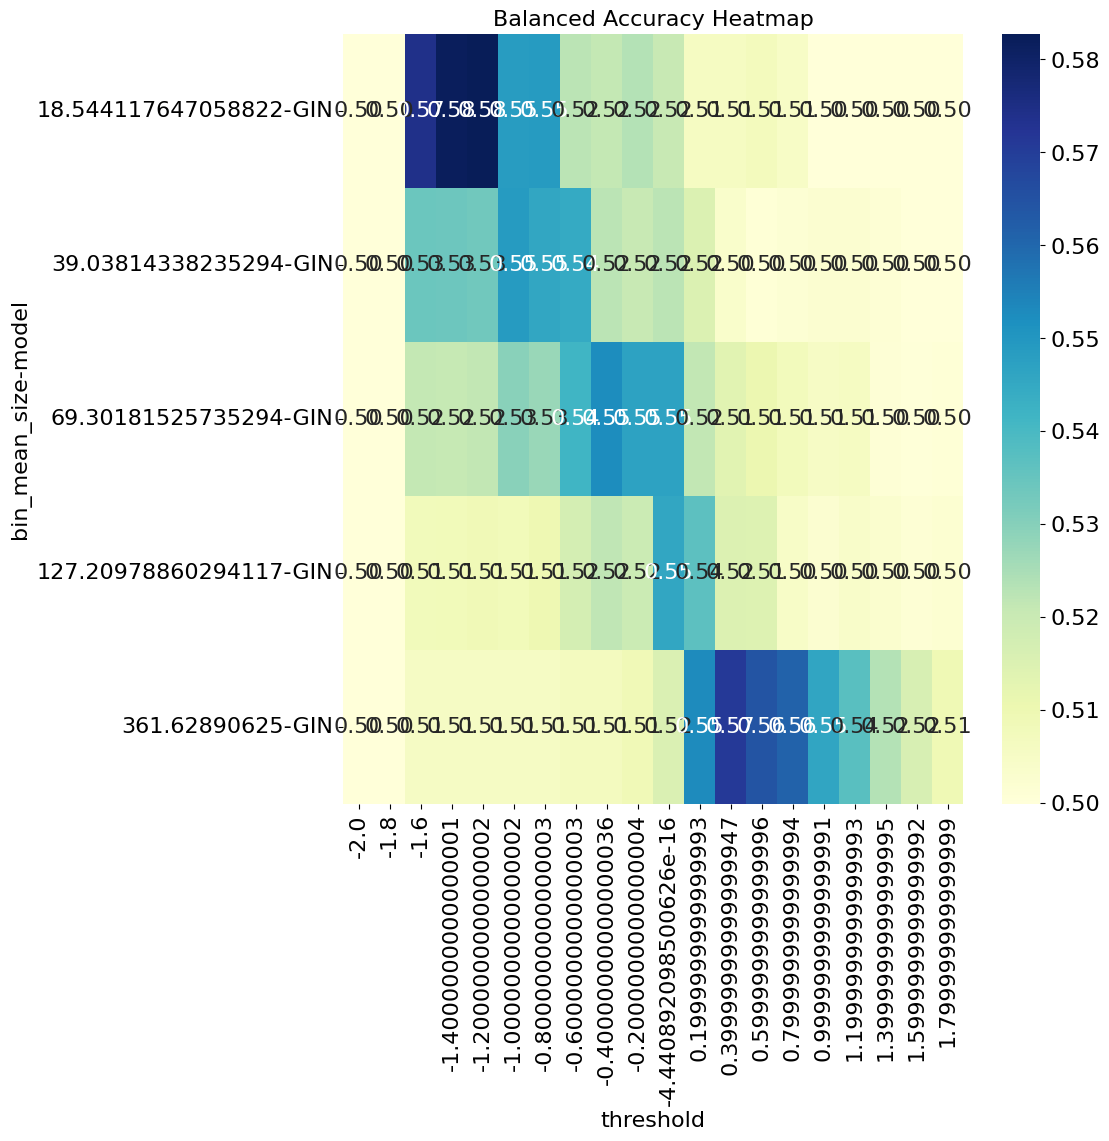

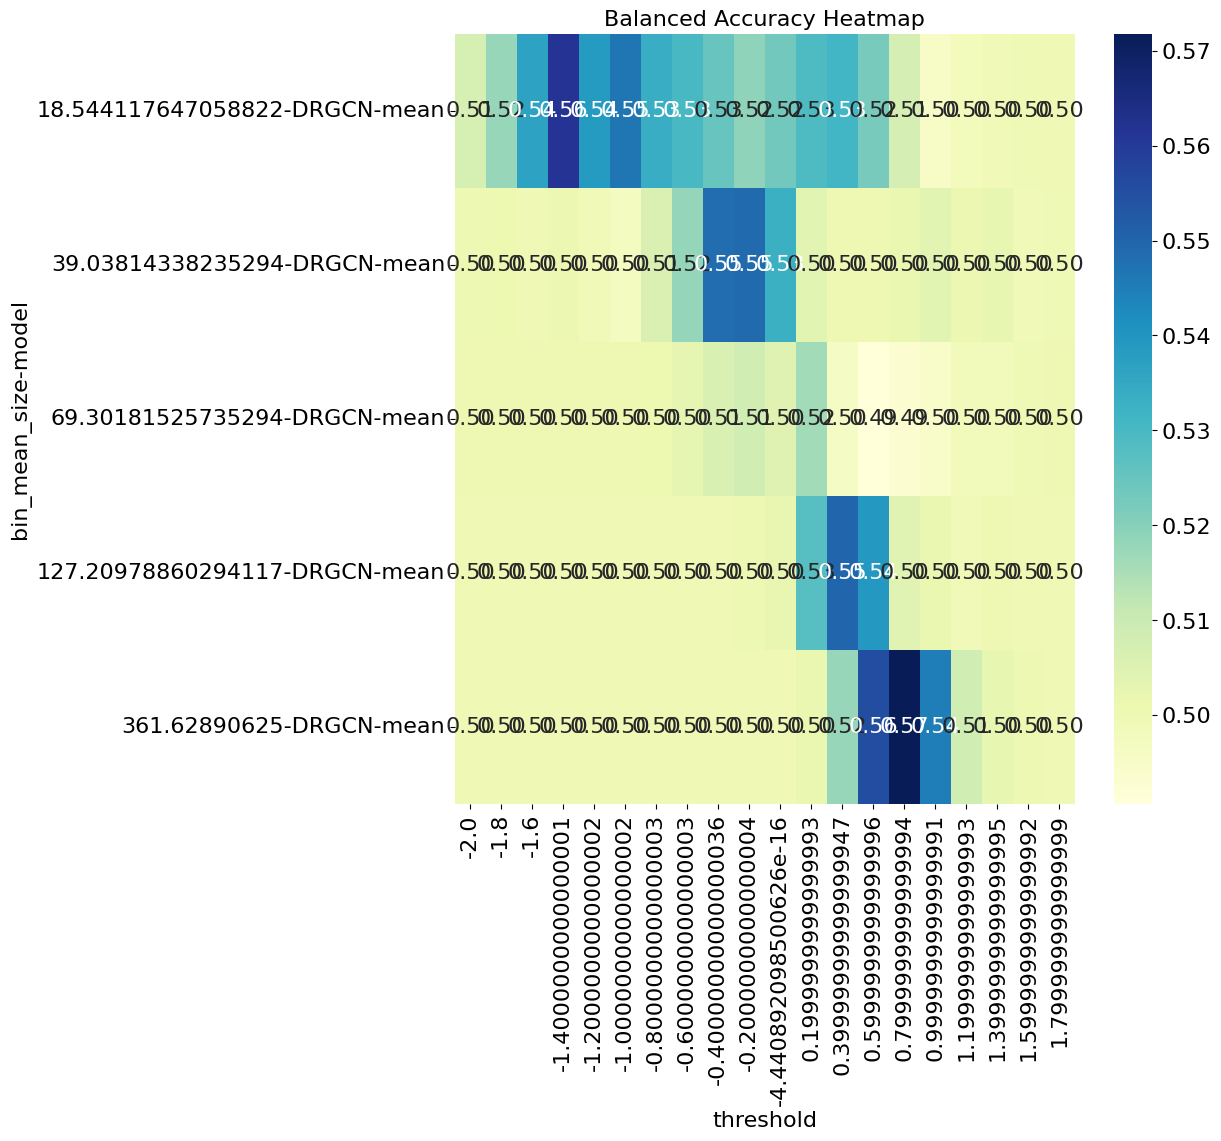

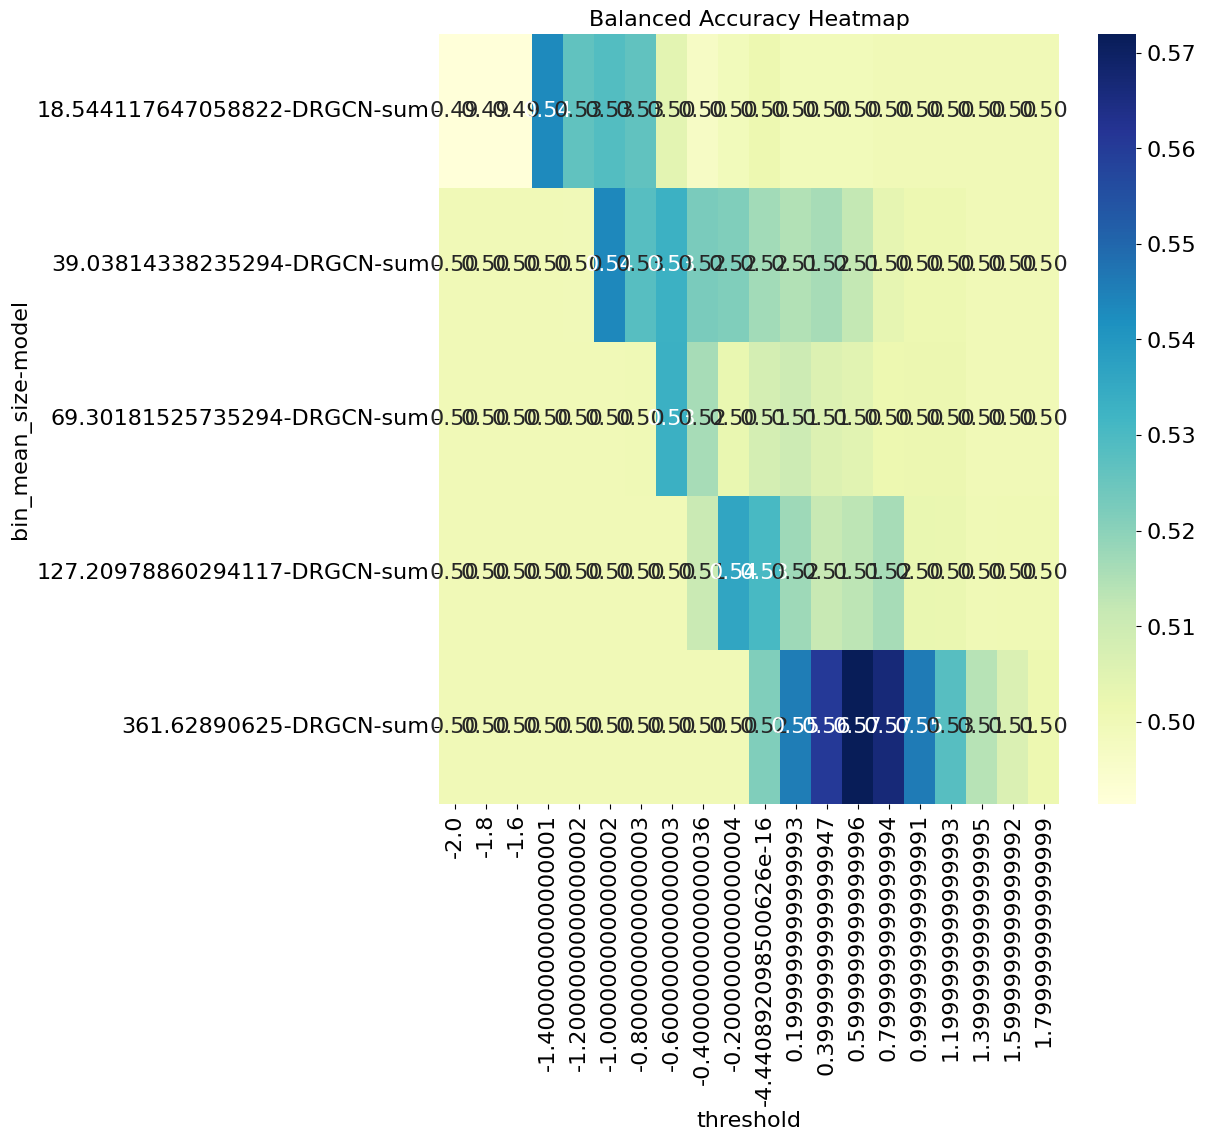

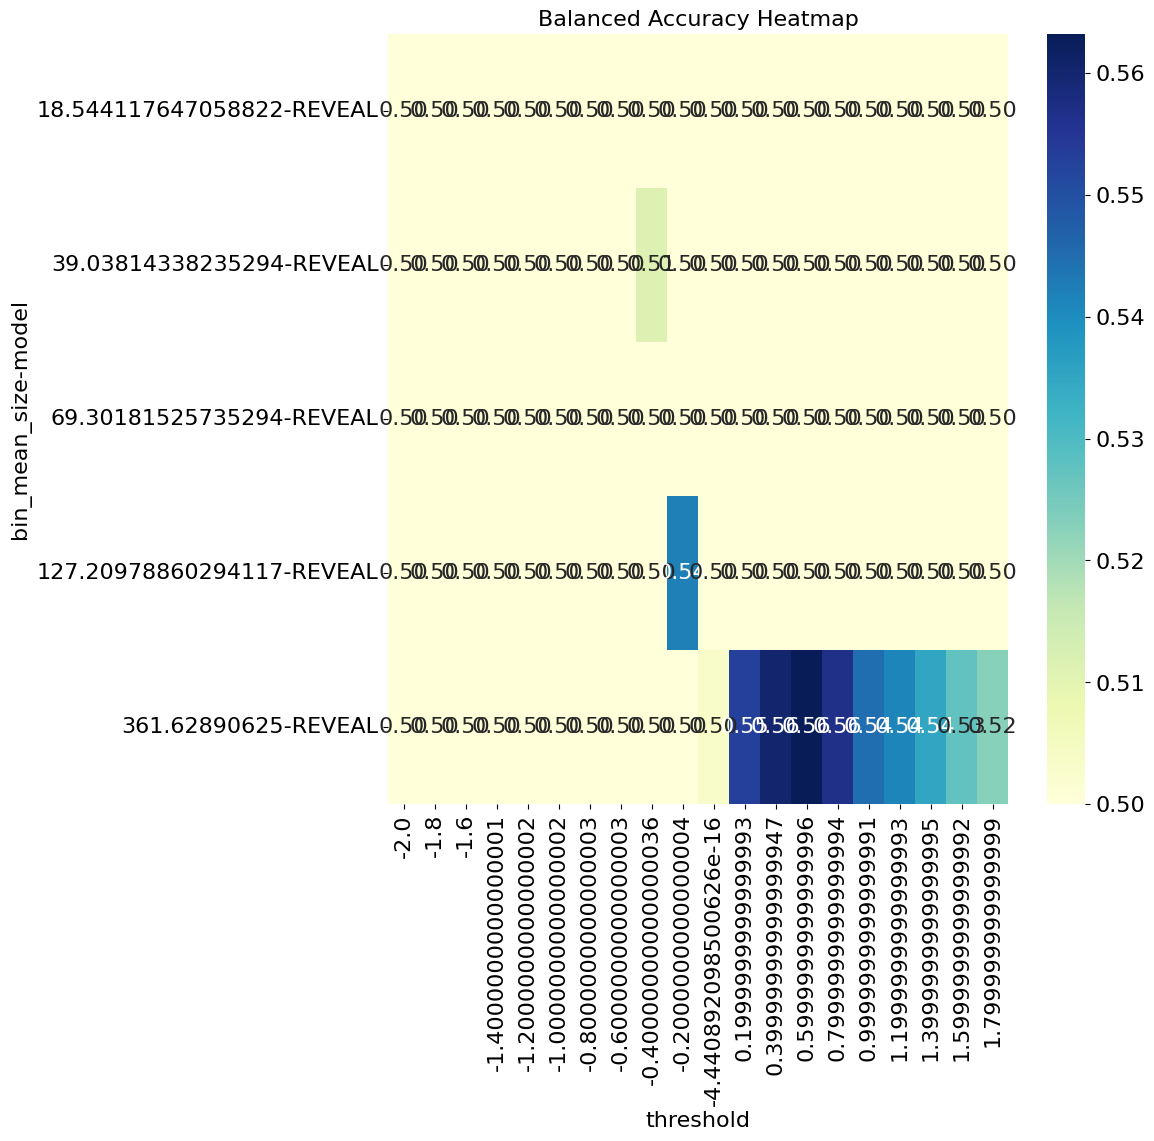

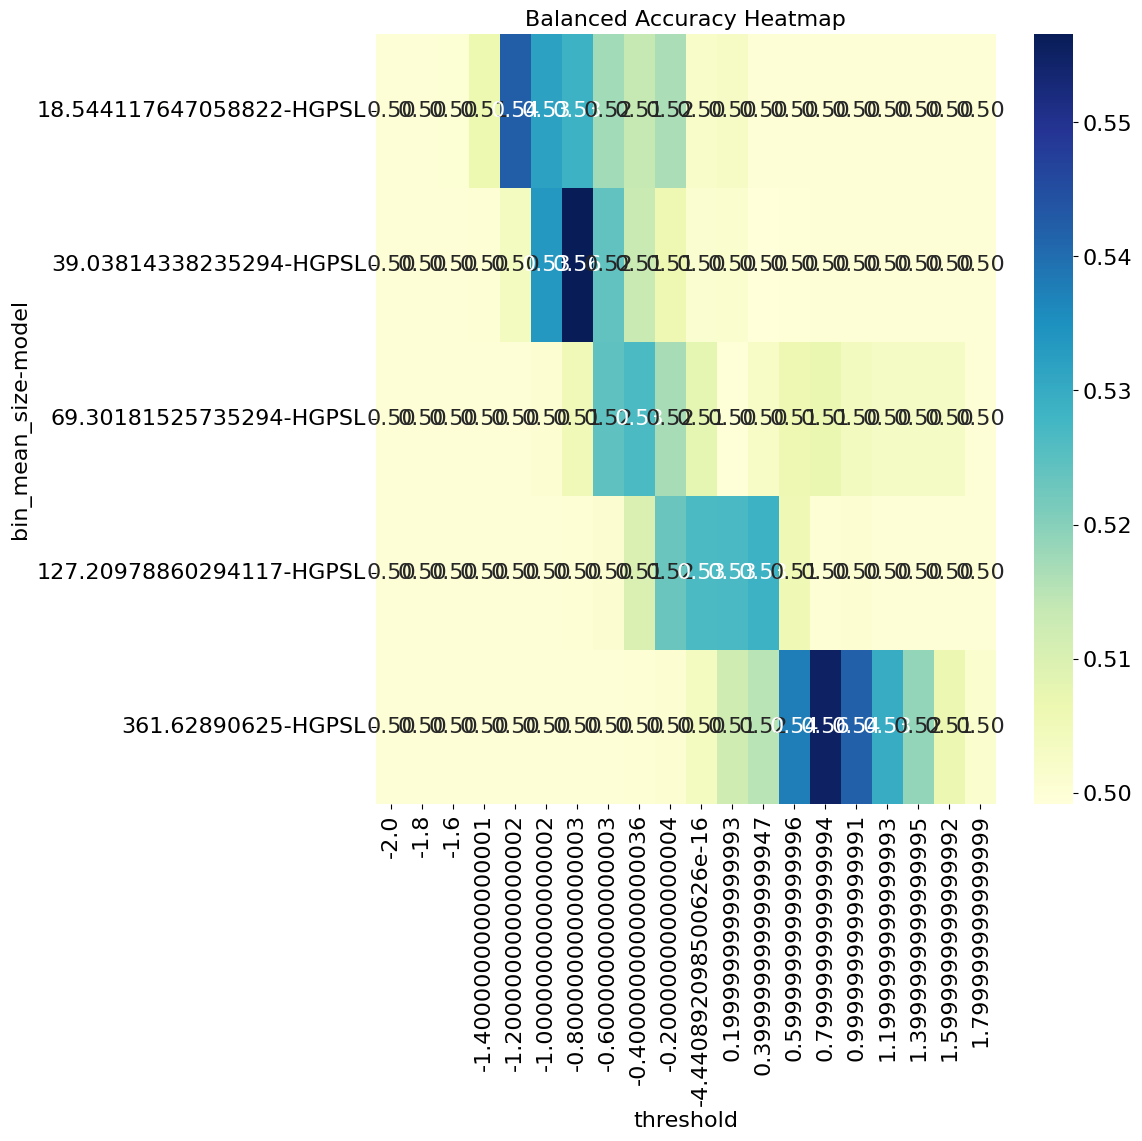

In [11]:
import seaborn as sns
import pandas as pd
# Bin the logits first into different thresholds: 
# Say, thresholds are from 0 to 1 with step 0.2

thresholds = np.arange(-2, 2, 0.2)

for model in datadict.keys():
    
    results = []
    
    num_bins = 5
    bins = [[] for _ in range(num_bins)]
    binsizes = [[] for _ in range(num_bins)]
    sorted_sizes = sorted(sizes.items(), key=lambda x: x[1])

    len_files = len(sorted_sizes)
    current_bin = 0
    for file in sorted_sizes:
        # fill bins from the bottom
        bins[current_bin].append(file[0])
        binsizes[current_bin].append(file[1])
        if len(bins[current_bin]) >= len_files / num_bins:
            current_bin += 1
            
    # plot performance of each model on each bin
    bin_average_size = [np.mean(bin) for bin in binsizes]
    for th in thresholds:
        
        for i, (bin, binavgsize) in enumerate(zip(bins,bin_average_size)):
            y_true = []
            y_pred = []
            for file in bin:
                logits = datadict[model][file]['logits']
                y_true.append(datadict[model][file]['y'])
                y_pred.append(1 if logits > th else 0)
                
            bal_acc = balanced_accuracy_score(y_true, y_pred)
            results.append([model, th, binavgsize , bal_acc])
        
    # gcn_thresholds = [30, 40, 110,200, 10000]
    # best_gcn_thresholds = [-1.4, -0.8,-0.4, 0.2,0.6]
    # currbin = 0
    # y_true, y_hat = [], []
    # for file in sorted_sizes:
    #     if file[1] < gcn_thresholds[currbin]:
    #         y_true.append(datadict[model][file[0]]['y'])
    #         y_hat.append(1 if datadict[model][file[0]]['logits'] > best_gcn_thresholds[currbin] else 0)
    #     else:
    #         currbin += 1
    #         y_true.append(datadict[model][file[0]]['y'])
    #         y_hat.append(1 if datadict[model][file[0]]['logits'] > best_gcn_thresholds[currbin] else 0)
            
    # print(model, balanced_accuracy_score(y_true, y_hat))
    
    # Create DataFrame
    results_df = pd.DataFrame(results, columns=['model', 'threshold', 'bin_mean_size', 'bal_acc'])

    pivot = pd.pivot_table(results_df, values='bal_acc', 
                        index=['bin_mean_size', 'model'], 
                        columns=['threshold'])

    # Generate Heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title('Balanced Accuracy Heatmap')
    plt.show()

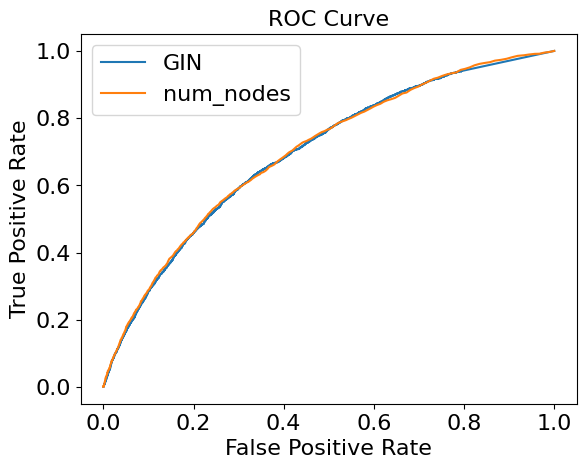

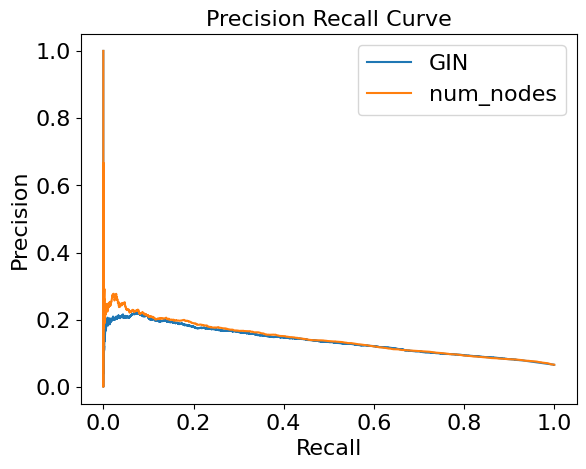

In [21]:
# GIN vs. sizes classifier
import sklearn.metrics as metrics

model = 'GIN'
y_true = []
y_pred = []
for file in sizes.keys():
    y_true.append(datadict[model][file]['y'])
    y_pred.append(datadict[model][file]['logits'])
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label=model)

y_true, y_pred = [], []
for file in sizes.keys():
    y_true.append(datadict[model][file]['y'])
    y_pred.append(sizes[file])

fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label='num_nodes')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

model = 'GIN'
y_true = []
y_pred = []
for file in sizes.keys():
    y_true.append(datadict[model][file]['y'])
    y_pred.append(datadict[model][file]['logits'])
precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.plot(recall, precision, label=model)

y_true, y_pred = [], []
for file in sizes.keys():
    y_true.append(datadict[model][file]['y'])
    y_pred.append(sizes[file])

precision, recall, _ = precision_recall_curve(y_true, y_pred)
plt.plot(recall, precision, label='num_nodes')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

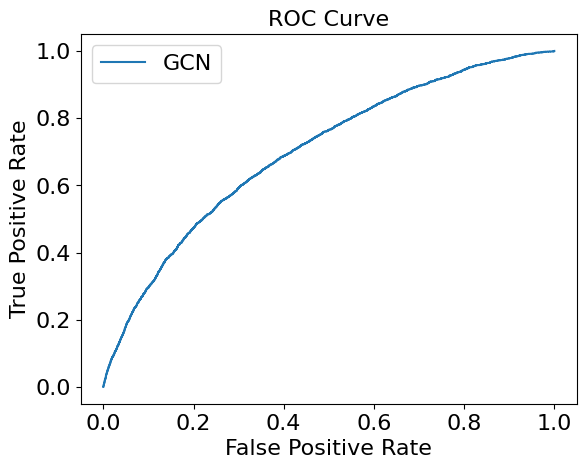

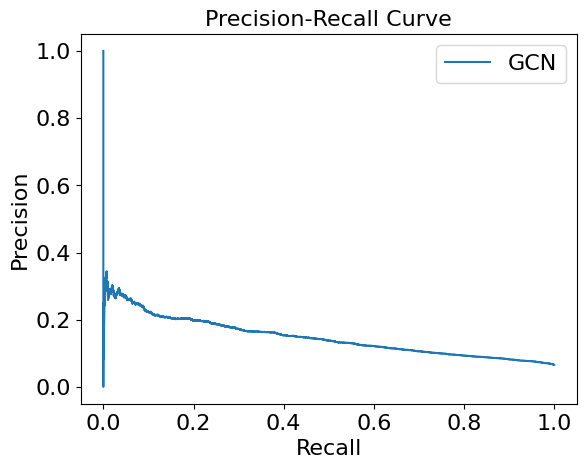

AUC for GCN: 0.7002836514576302
Precision-Recall AUC for GCN: 0.1472717465229874
F1 Score for GCN: 0.21796093377798953
Accuracy for GCN: 0.8491268382352941
Confusion Matrix for GCN:
[[36039  4607]
 [ 1959   915]]



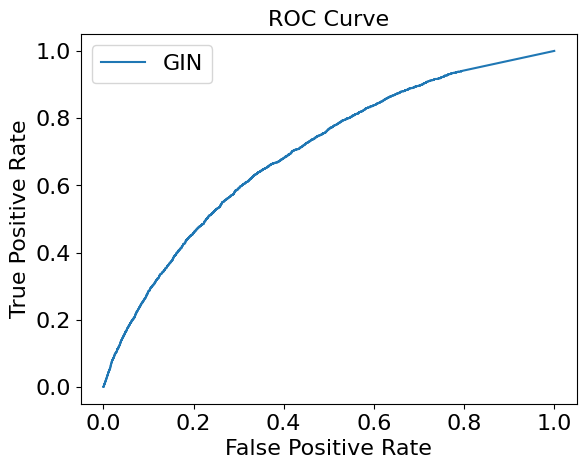

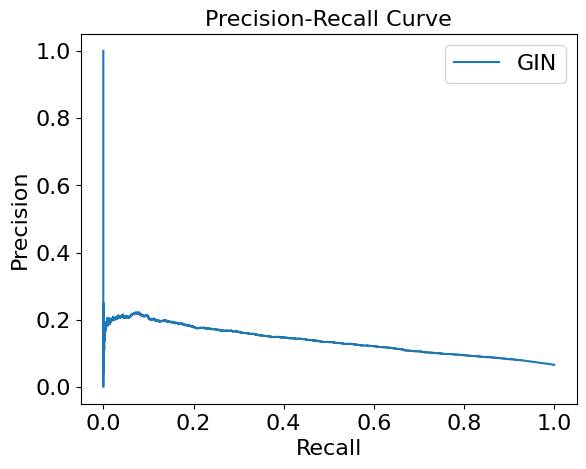

AUC for GIN: 0.6959141313507111
Precision-Recall AUC for GIN: 0.13662310311053788
F1 Score for GIN: 0.20613627307743393
Accuracy for GIN: 0.8626608455882353
Confusion Matrix for GIN:
[[36767  3879]
 [ 2098   776]]



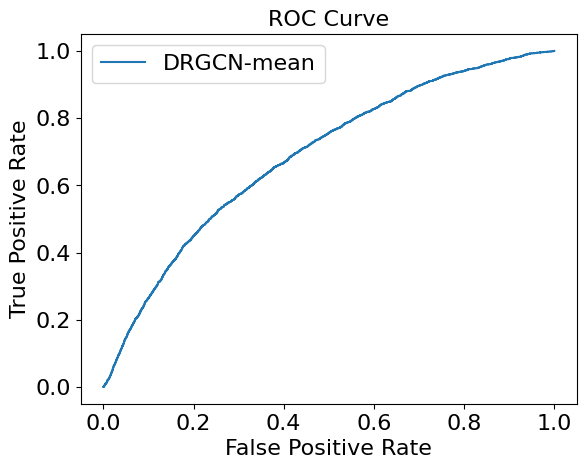

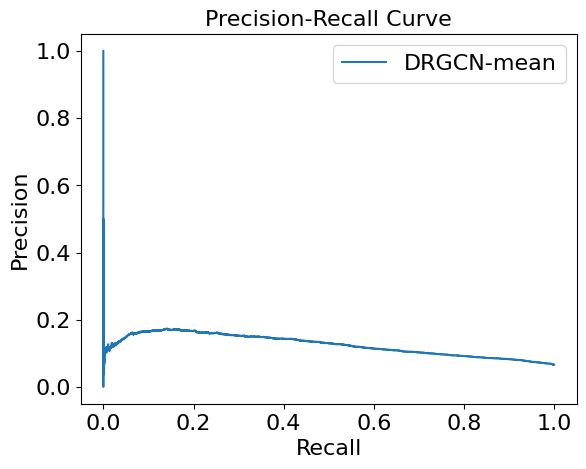

AUC for DRGCN-mean: 0.6873307496595261
Precision-Recall AUC for DRGCN-mean: 0.12451632141520955
F1 Score for DRGCN-mean: 0.2067550736317679
Accuracy for DRGCN-mean: 0.7512178308823529
Confusion Matrix for DRGCN-mean:
[[31282  9364]
 [ 1463  1411]]



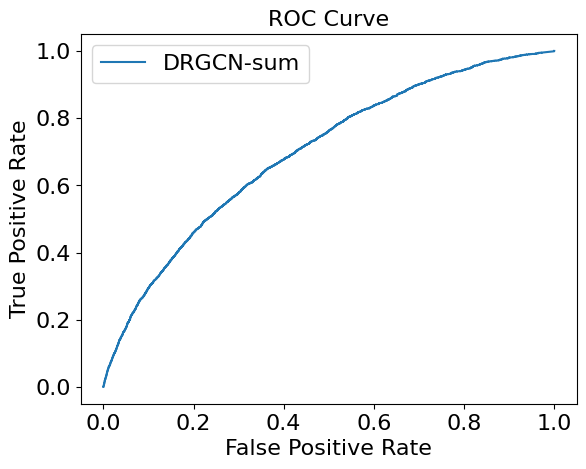

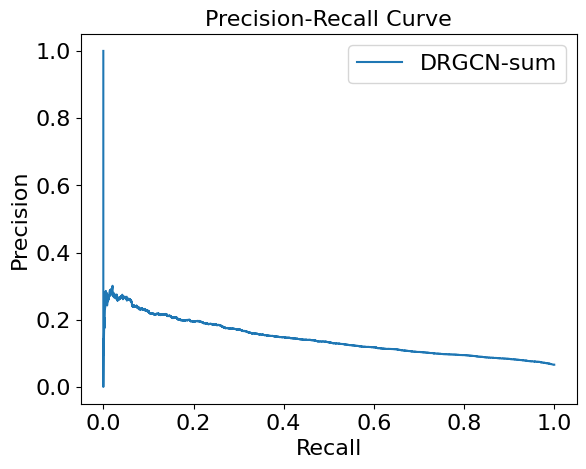

AUC for DRGCN-sum: 0.69674168494061
Precision-Recall AUC for DRGCN-sum: 0.1438470117293964
F1 Score for DRGCN-sum: 0.21710928894872109
Accuracy for DRGCN-sum: 0.8530101102941177
Confusion Matrix for DRGCN-sum:
[[36236  4410]
 [ 1987   887]]



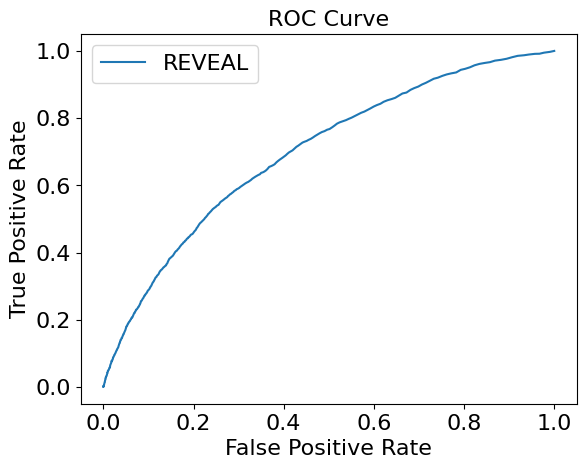

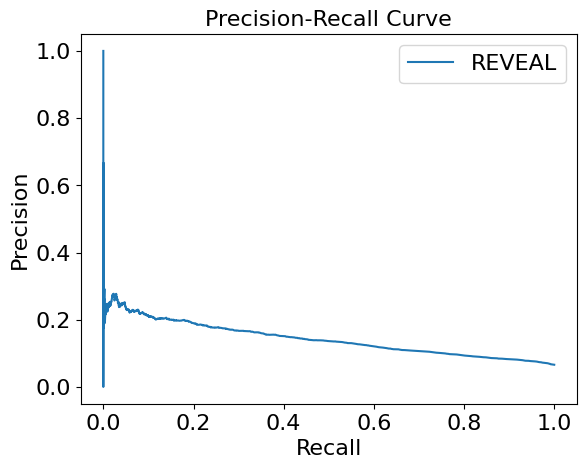

AUC for REVEAL: 0.6988822753313392
Precision-Recall AUC for REVEAL: 0.1422821845497751
F1 Score for REVEAL: 0.19984214680347276
Accuracy for REVEAL: 0.8835248161764706
Confusion Matrix for REVEAL:
[[37818  2828]
 [ 2241   633]]



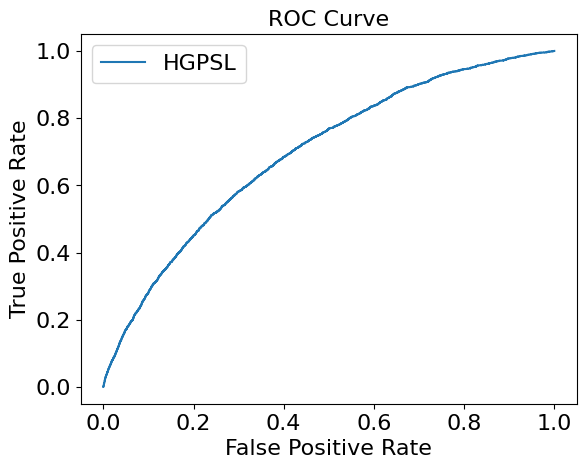

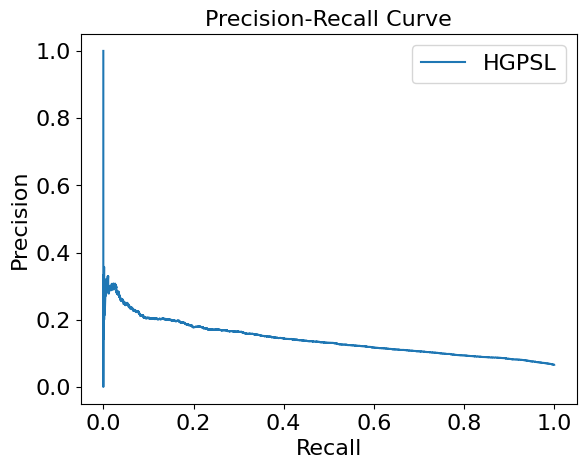

AUC for HGPSL: 0.6957339814466786
Precision-Recall AUC for HGPSL: 0.14097005507092011
F1 Score for HGPSL: 0.21183747100764538
Accuracy for HGPSL: 0.7891773897058824
Confusion Matrix for HGPSL:
[[33112  7534]
 [ 1641  1233]]



In [12]:
# make auc and precision-recall curves for each model
import sklearn.metrics as metrics

for model in datadict.keys():
    y_true = []
    y_pred = []
    for file in sizes.keys():
        y_true.append(datadict[model][file]['y'])
        y_pred.append(datadict[model][file]['logits'])
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=model)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    precision, recall, _ = metrics.precision_recall_curve(y_true, y_pred)
    plt.plot(recall, precision, label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    
    auc = metrics.roc_auc_score(y_true, y_pred)
    print(f'AUC for {model}: {auc}')
    
    pr_auc = metrics.auc(recall, precision)
    print(f'Precision-Recall AUC for {model}: {pr_auc}')
    
    f1 = metrics.f1_score(y_true, [1 if pred > 0.5 else 0 for pred in y_pred])
    print(f'F1 Score for {model}: {f1}')
    
    acc = metrics.accuracy_score(y_true, [1 if pred > 0.5 else 0 for pred in y_pred])
    print(f'Accuracy for {model}: {acc}')
    
    cm = metrics.confusion_matrix(y_true, [1 if pred > 0.5 else 0 for pred in y_pred])
    print(f'Confusion Matrix for {model}:')
    print(cm)
    
    print()

In [13]:
# on sample basis compare the logits between all models, calculate the delta between min and max logit between all models
delta_files = {}
for filename in len_:
    min_logit = min([datadict[name][filename]['logits'] for name in names])
    max_logit = max([datadict[name][filename]['logits'] for name in names])
    delta_files[filename] = max_logit - min_logit
    

In [14]:
import matplotlib.pyplot as plt
# plot delta files sorted by delta
sorted_files = sorted(delta_files.items(), key=lambda x: x[1], reverse=True)
# sorted_files = sorted_files[:10]
fig, ax = plt.subplots()
ax.bar([x[0] for x in sorted_files], [x[1] for x in sorted_files])
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 